This is an example of using Python calculate and plot the motion of a springy pendulum (a simple plane pendulum, but with an elastic string). The motion is calculated by integration of a set of first-order differential equations. Order of variables in the array u[]:
1. $u[0]=y$ (pendulum length, named $\ell$ in the assignment)   
1. $u[1]=dy/dt$
1. $u[2]=\phi$ (pendulum angle, named $\phi$ in the assignment)   
1. $u[3]=d\phi/dt$

In [17]:
import matplotlib.pyplot as plt
from matplotlib import animation
from scipy.integrate import odeint
import numpy as np
import math

In [32]:
# Parameters describing the system
g = 9.8                   # acceleration of gravity in m/s^2
m = 144                   # mass
k = 36                    # spring constant
b = 7                     # unextended length of the spring
b0 = b + (m*g)/k

# Assign initial conditions to the motion.
y0 = 2*b                         # initial extension of the pendulum
yDot0 = 0.                       # initial rate of change of length of the pendulum
phi0 = 60*math.pi/180.           # initial angle of the pendulum, in radians
phiDot0 = 0.                     # initial angular velocity of the pendulum
u0 = [y0, yDot0, phi0, phiDot0]  # initial conditions for all 4 variables

In [33]:
# This function gives the time derivative of each of the 4 variables. These follow from the
# Lagrange equations of motion, but note that it is necessary to convert the two 2nd-order
# differential equations into four 1st-order equations. 
def dudt(u, t):
    r = [0., 0., 0., 0.]
    r[0] = u[1] # the time derivative of y
    r[1] = (u[0]*u[3]*u[3] - (k/m)*(u[0]-b0) + g*np.cos(u[2]))     # enter here the formula for the time derivative of dy/dt (i.e. the 2nd derivative)
    r[2] = u[3] # the time derivative of phi
    r[3] = (-((2*u[1]) / u[0])*u[3] - (g/u[0])*np.sin(u[2]))     # enter here the formula for the time derivative of dphi/dt (i.e. the 2nd derivative)
    return r

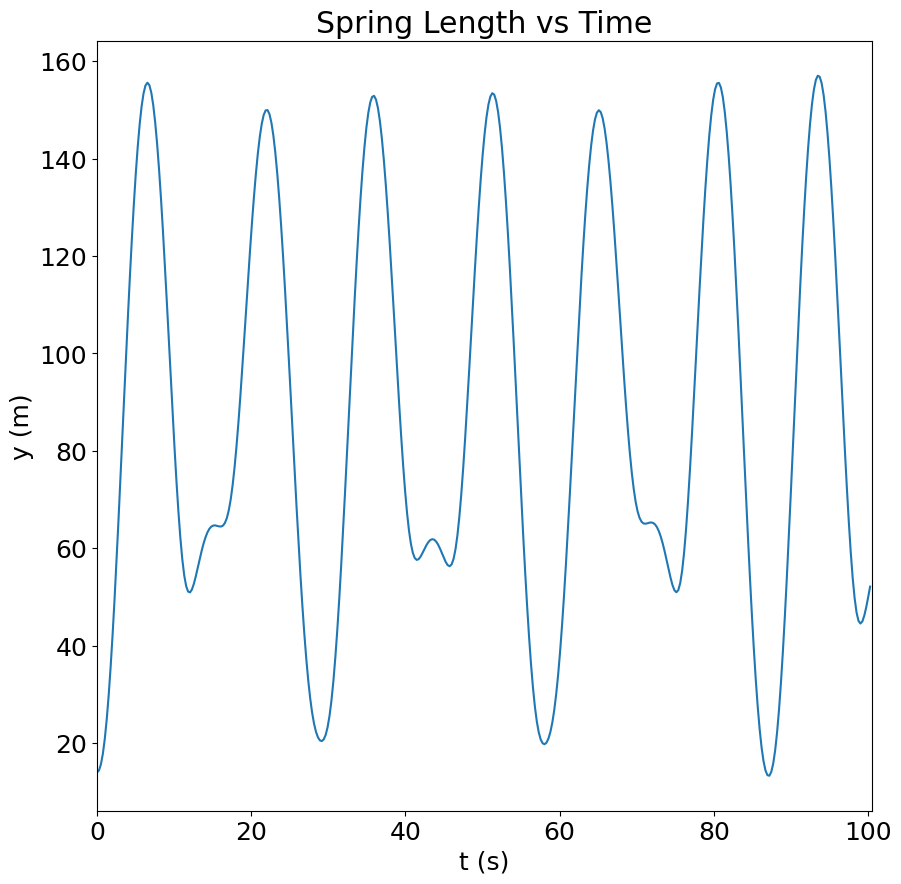

In [40]:
# Use the scipy odeint routine to carry out the numerical integration of the system of equations.
tau = 2.*math.pi*math.sqrt(m/k)
t0 = 0.                   # start time
t1 = 8.0*tau              # end time
N = 400                   # number of time steps

# Choose a set of time values at which to evaluate the solution y(t)
t = np.arange(t0,t1, (t1-t0)/N)

# Call the routing from scipy that does the integration
u = odeint(dudt, u0, t)

font = {'size'   : 18}
plt.rc('font', **font)

# Use pyplot from matplotlib to plot the motion y(t)
fig, ax = plt.subplots(figsize=(10,10))
plt.xlim(t0, t1)
ax.set_xlabel('t (s)')
ax.set_ylabel('y (m)')
ax.plot(t,u[...,0])
plt.title("Spring Length vs Time")
plt.show()

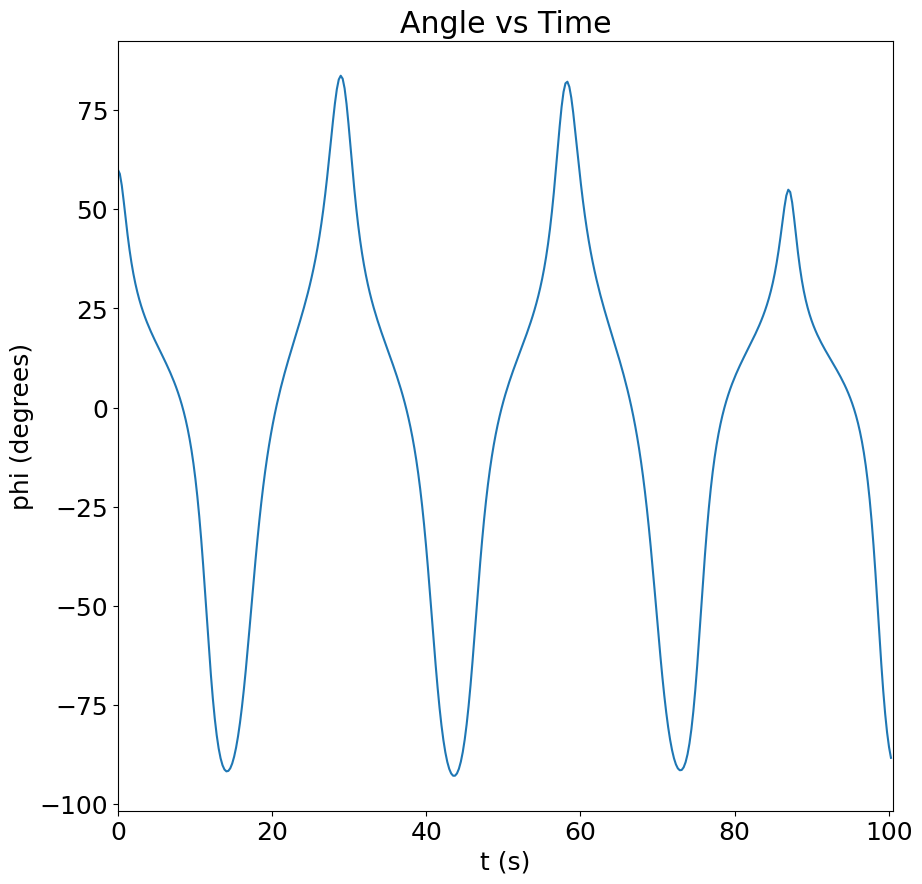

In [41]:
# Plot the motion theta(t)
fig, ax = plt.subplots(figsize=(10,10))
plt.xlim(t0, t1)
ax.set_xlabel('t (s)')
ax.set_ylabel('phi (degrees)')
ax.plot(t,u[...,2]*180./math.pi)
plt.title("Angle vs Time")
plt.show()

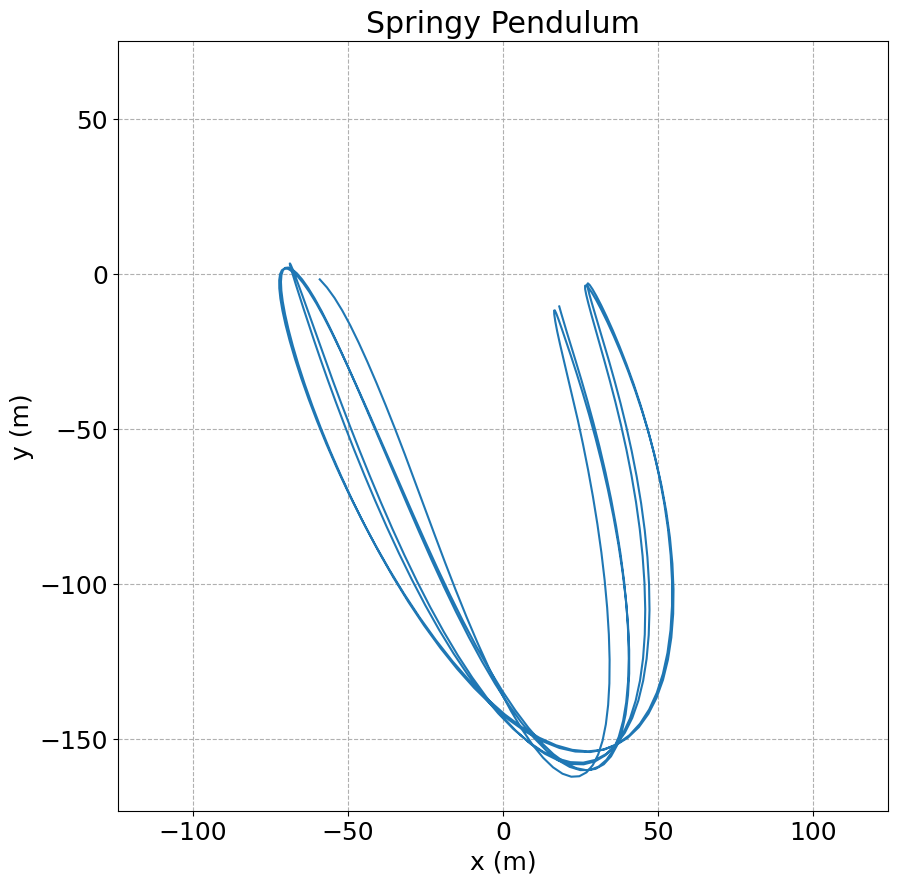

In [42]:
# Calculate and plot the 2D trajectories of the masses
X = np.zeros(N)
Y = np.zeros(N)
for i in range(N):
    X[i] = (b+u[i,0])*math.sin(u[i,2])
    Y[i] = -(b+u[i,0])*math.cos(u[i,2])
    
fig, ax = plt.subplots(figsize=(10,10))
plt.xlim(2.5*-7.1*b, 2.5*7.1*b)
plt.ylim(2.5*-7.1*b-7*b, 2.5*7.1*b-7*b)
ax.set_xlabel('x (m)')
ax.set_ylabel('y (m)')
ax.set_aspect('equal')
plt.title("Springy Pendulum")
ax.plot(X,Y)
ax.grid(linestyle='--')
plt.show()